In [4]:
import seaborn as sns
sns.set()  # used for plot styling

# [Short Python Blog] - Comparing time series

Time series data is an essential part of many fields, including finance, weather, and stock markets. Comparing two time series is often necessary for analyzing trends, identifying patterns, and making predictions. In this blog post, we will briefly explore techniques that can be used to compare two time series in Python using various techniques.

First, let's discuss what a time series is. A time series is a set of data points collected over a period of time. The data points are often collected at regular intervals, such as every hour or every day. Time series data can be found in many fields, such as finance, economics, and meteorology.

Now, let's explore some methods to compare two time series in Python.

## Visual Comparison
The easiest and quickest way to compare two time series is through visualization. The plot helps to identify any similarities, differences, and patterns in the data. Python provides several libraries for visualizing time series data, such as `matplotlib` and `seaborn`.


Let's consider two time series data for daily stock values for two cryptocurrencies: BTC and ADA. To make the comparison easier, both series were normalized by the highest value for the selected cryptocurrency in a given time.

We can use the following code to plot the data:

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("./data.csv")
df.head()

,BTC,ADA
0,0.833805,0.965138
1,0.845594,0.988049
2,0.904853,1.000000
3,1.000000,0.985114
4,0.857499,0.999427


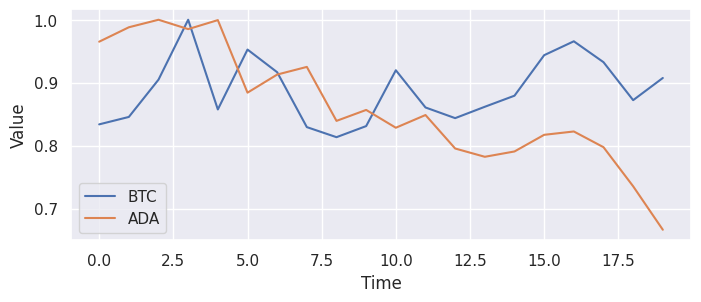

In [7]:
import matplotlib.pyplot as plt

# specify plot dimensions
plt.figure(figsize=(8, 3))

# plot the two time series
plt.plot(df['BTC'], label='BTC')
plt.plot(df['ADA'], label='ADA')

# add legend and labels
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')

# display the plot
plt.show()

This could be even more simplified by using `pandas` that provide a direct and simplified interface for plotting:

<AxesSubplot: xlabel='Time', ylabel='Value'>

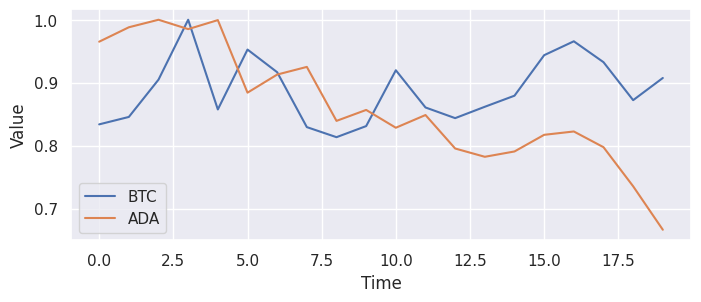

In [8]:
# pandas interface for plotting pd.DataFrame content
df.plot(figsize=(8, 3), xlabel="Time", ylabel="Value")

The resulting plot will show the daily prices of both cryptocurrencies over time, enabling us to observe any similarities and differences in the trends.

## Correlation
Correlation is another way to compare two time series data in Python. It measures the strength and direction of the linear relationship between two variables. We can use the Pearson correlation coefficient, which ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

We can use the following code to calculate the correlation coefficient between the two cryptocurrencies:

In [9]:
# calculate the correlation coefficient
corr_coef = df.corr()['BTC']['ADA']

print(f"Correlation Coefficient: {corr_coef}")

Correlation Coefficient: -0.033708436264221306


The resulting output will display the correlation coefficient between the two time series. A positive value indicates a positive correlation, whereas a negative value indicates a negative correlation.

## Seasonal Decomposition
Time series data often has a seasonal component that repeats over time. Seasonal decomposition is a technique that separates the time series into its seasonal, trend, and residual components. We can use Python's Statsmodels library to decompose a time series into its components.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


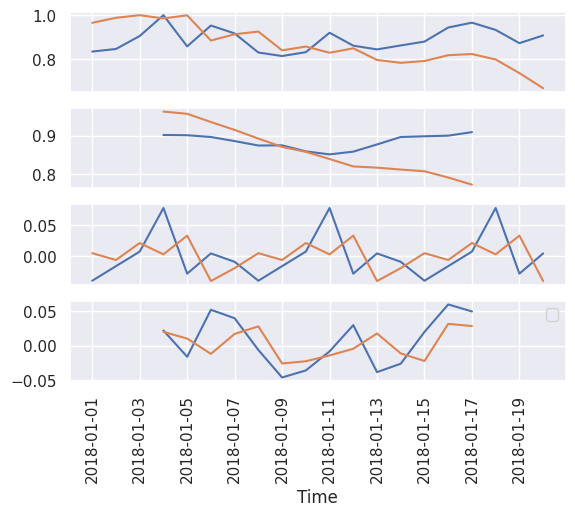

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# since `seasonal_decompose` requires a specific type of index, we are adding a DatetimeIndex
df.index = pd.date_range(start='1/1/2018', end='1/20/2018')

# decompose the two time series
decomp1 = seasonal_decompose(df['BTC'])
decomp2 = seasonal_decompose(df['ADA'])

# plot the trend and seasonal components
_, axes = plt.subplots(4, 1, sharex=True)
axes[0].plot(decomp1.observed)
axes[0].plot(decomp2.observed)

axes[1].plot(decomp1.trend)
axes[1].plot(decomp2.trend)

axes[2].plot(decomp1.seasonal)
axes[2].plot(decomp2.seasonal)

axes[3].plot(decomp1.resid)
axes[3].plot(decomp2.resid)

plt.xticks(rotation=90)
plt.xlabel("Time")
plt.legend()

The resulting plot will display the time series data and its decomposition into its seasonal, trend, and residual components. We can use this technique to compare the seasonal patterns in the two time series.

If you want to learn more about seasonal decomposition, you can start by checking https://otexts.com/fpp2/components.html.

## Dynamic Time Warping (DTW)
Dynamic Time Warping (DTW) is a powerful method for comparing two time series that have different lengths or shapes. DTW works by finding the best alignment between two time series, by allowing for some flexibility in the warping of the time axis. In Python, there are several libraries available for performing DTW, including `dtw-python` and `fastdtw`. In this post, we will focus on `dtw-python`, a widely used and versatile Python library for DTW.

The following code compares the DTW distance between BTC and ADA daily prices:

In [11]:
from dtw import *

# calculate the DTW distance
alignment = dtw(
    df['BTC'], df['ADA'],
    keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c")
)

print(f"Remaining cumulative distance: {alignment.distance}")

Remaining cumulative distance: 1.4040646442239635


The resulting output will display the DTW distance between the two time series data. The smaller the distance, the more similar the time series are.

The `dtw` function returns not only the DTW distance between the two time series, but also the optimal warping path between them. This warping path shows how the two time series are aligned to each other, and can be useful for visualizing the similarity between them. The following code demonstrates how to visualize the DTW path

<AxesSubplot: xlabel='Index', ylabel='Query value'>

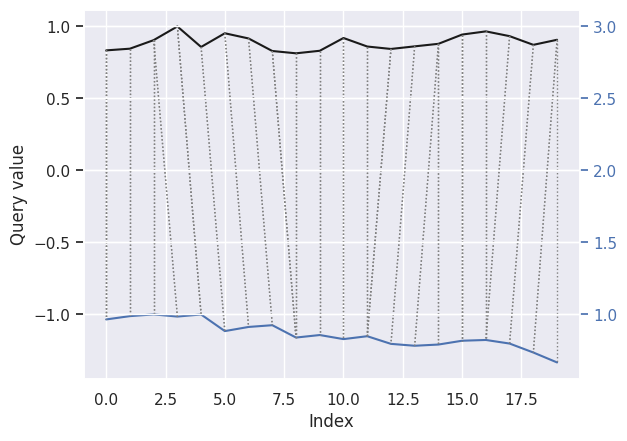

In [12]:
# plot the alignment
alignment.plot(type="twoway", offset=-2)

If you would like to learn more about DTW, you can start by checking https://dynamictimewarping.github.io/ documentation.

## Conclusion
Comparing two time series is an essential task in many fields. In this blog post, we explored four techniques for comparing time series data in Python: visual comparison, correlation, seasonal decomposition, and DTW. By using these techniques, we can identify patterns, trends, and similarities in time series data and make more accurate predictions.